# eval Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public 'https://maven.scijava.org/content/groups/public'
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@7b00c550

This `Op` has the ability to evaluate a mathematical expression contained in a String by first parsing the expression using the [Scijava expression parsing library](https://github.com/scijava/parsington) and then invoking other Ops to complete the parsed expressions. 

We can call an `eval` Op using the following syntax:

In [2]:
ij.op().help('eval')

Available operations:
	(Object out) =
	net.imagej.ops.eval.DefaultEval(
		String in,
		Map vars?)

All of the variables that we would like to use are stored by name and value in a `HashMap<String, Object>` object, which is later passed through into the `eval` op. 

In [3]:
//create the HashMap
vars = new HashMap<String, Object>()

//store some values in the HashMap for later use
vars.put("foo", 8)
vars.put("bar", 13)
vars.put("cat", 24)
""

We also need a few `Strings` describing the expressions that we want to evaluate:

In [4]:
//create the expression strings
multiply = "foo*bar"
modulus = "cat%foo"
orderOfOperations = "cat*cat+foo"
""

Now that we have created our variables and our expressions, let's use an `Eval` Op to evaluate our expressions:

In [5]:
//run eval on the expressions and variables
println(ij.op().eval(multiply, vars))
println(ij.op().eval(modulus, vars))
println(ij.op().eval(orderOfOperations, vars))
""

104
0
584


`eval` has the knowledge to parse out the mathematical symbols `+, -, *, /, %, ^, <, >, <=, >=, |, ||, &, &&, =, !=, >>, <<, >>>`, but it can also be used to run any other Op contained within `Ops`! This can be particularly useful if you need to code a program that does not know the `Op` that it needs to run before runtime. For example, let's run a Gaussian on [this image](http://imagej.net/images/clown.png):

[INFO] Populating metadata
[INFO] Populating metadata


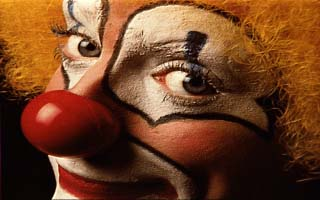

In [6]:
//retrieve and display input image
input = ij.scifio().datasetIO().open("http://imagej.net/images/clown.jpg")
ij.notebook().display(input)

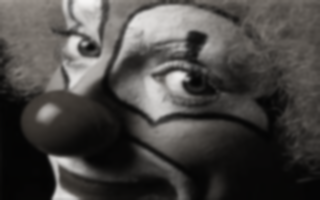

In [7]:
//add the input image and sigma value to the HashMap
vars.put("input", input)
vars.put("sigma", 1.5)

//create the expression string
gaussString = "gauss(input, sigma)"

//run eval on the expression and variables
output = ij.op().eval(gaussString, vars)

//display the output
ij.notebook().display(output)